In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [5]:
wines = pd.read_csv("wine.csv")
wines.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [29]:
##EDA
wines.describe

<bound method NDFrame.describe of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoid

In [31]:
wines.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [12]:
wines1.corr()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


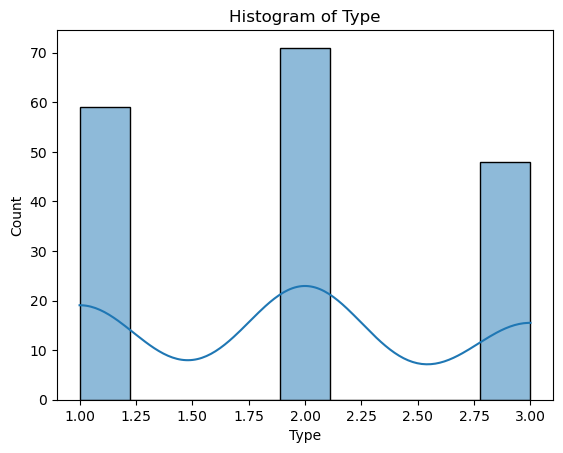

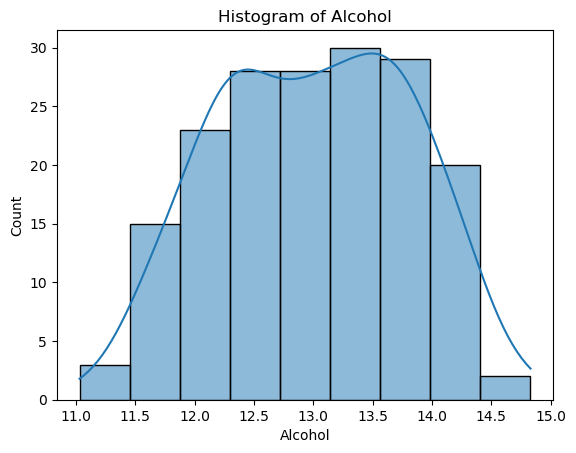

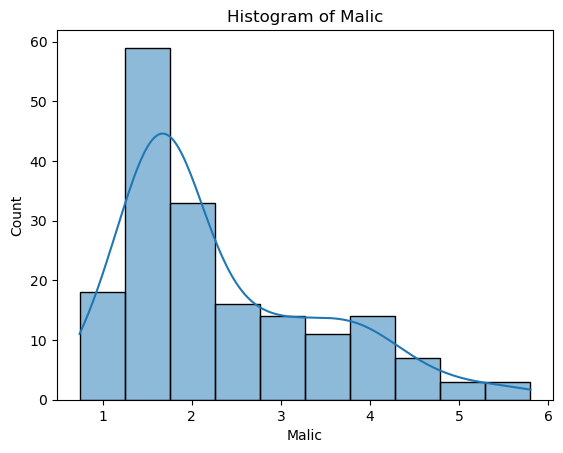

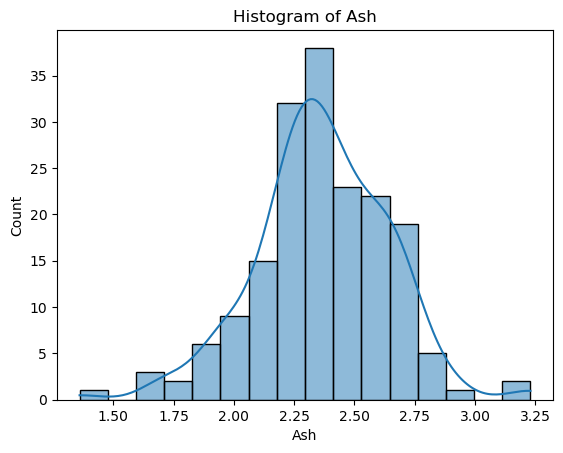

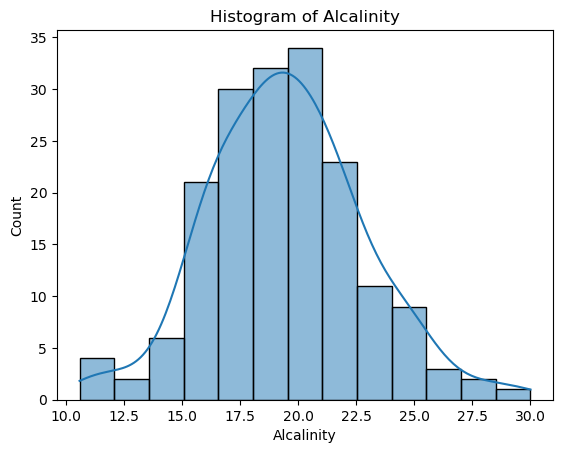

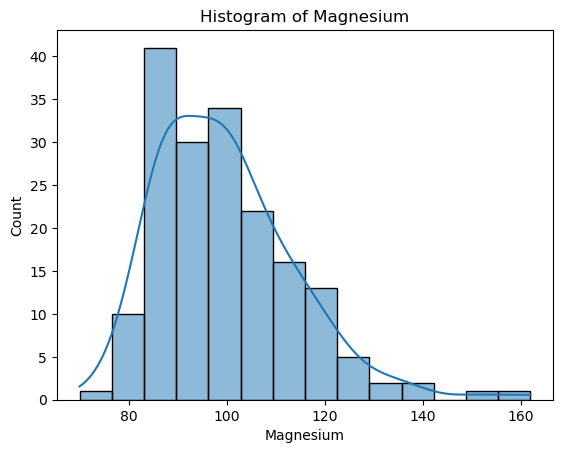

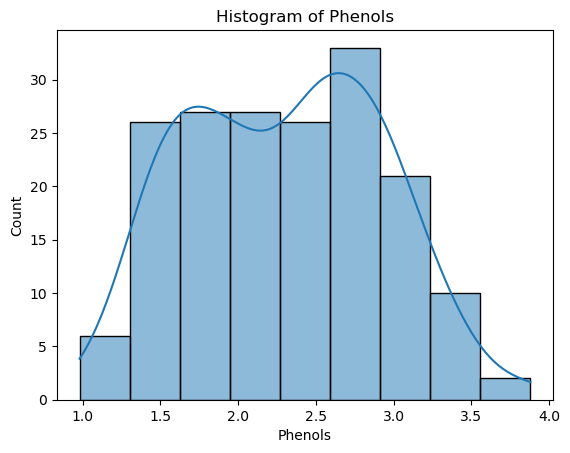

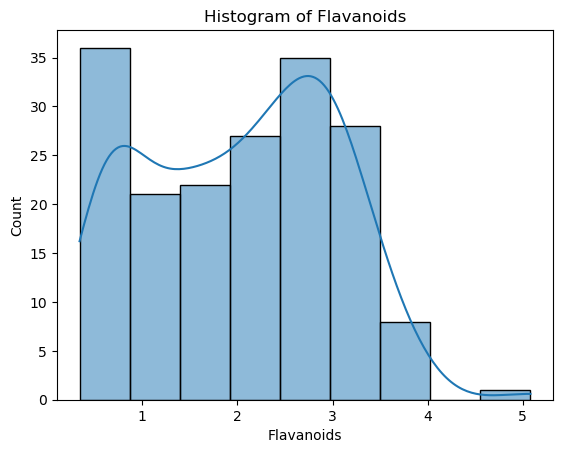

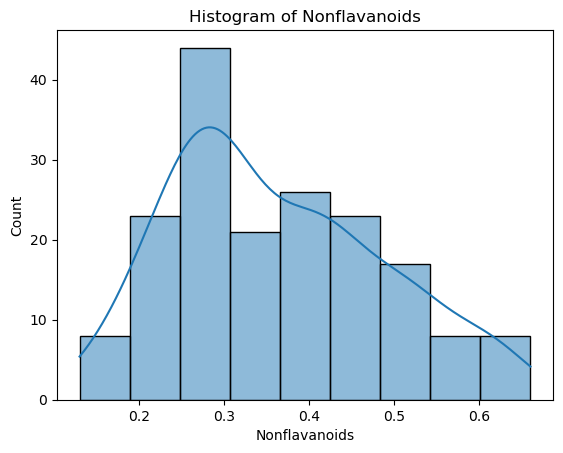

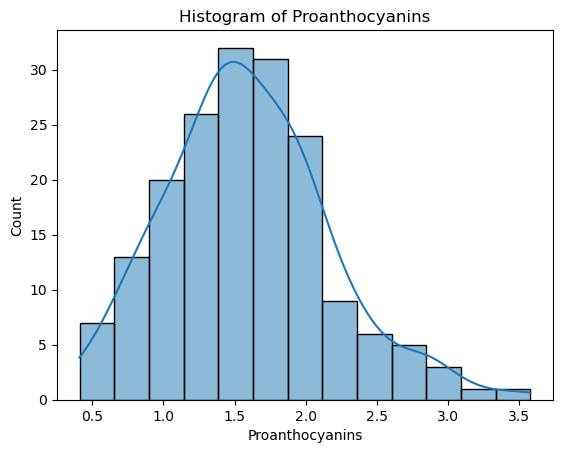

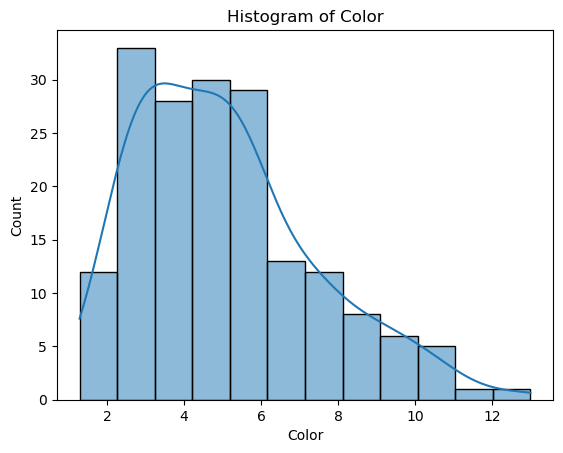

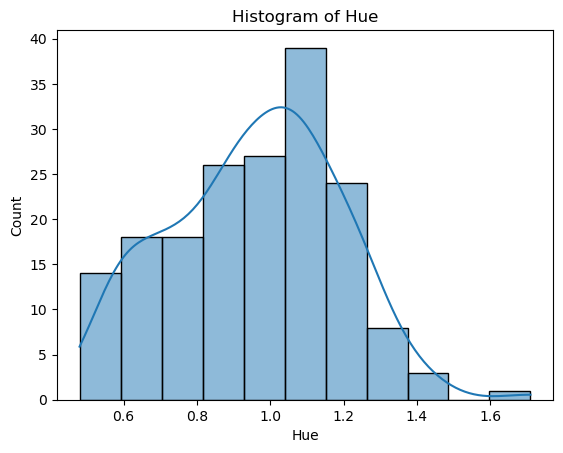

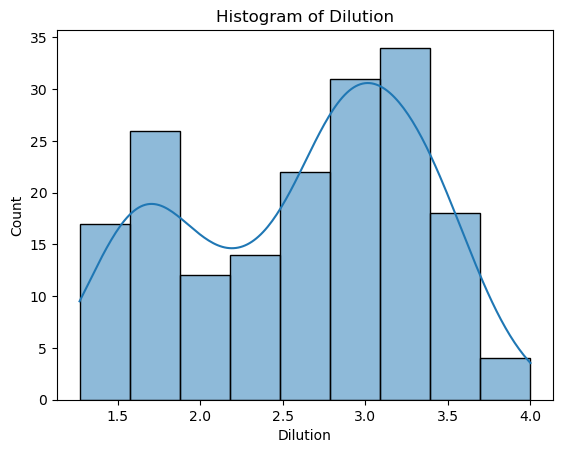

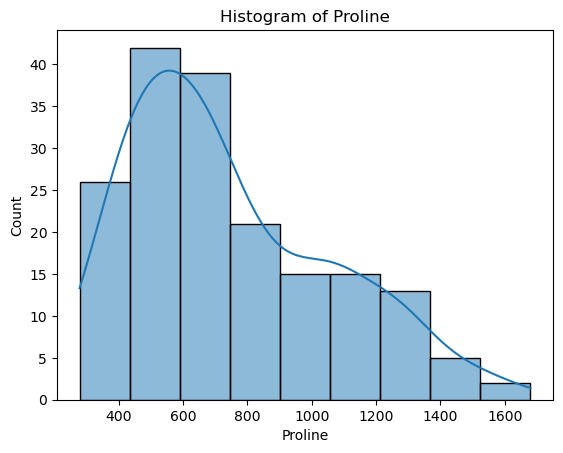

In [33]:
numeric_features = wines.select_dtypes(include=np.number).columns
for column in numeric_features:
    sns.histplot(wines[column], kde=True)
    plt.title(f"Histogram of {column}")
    plt.show()

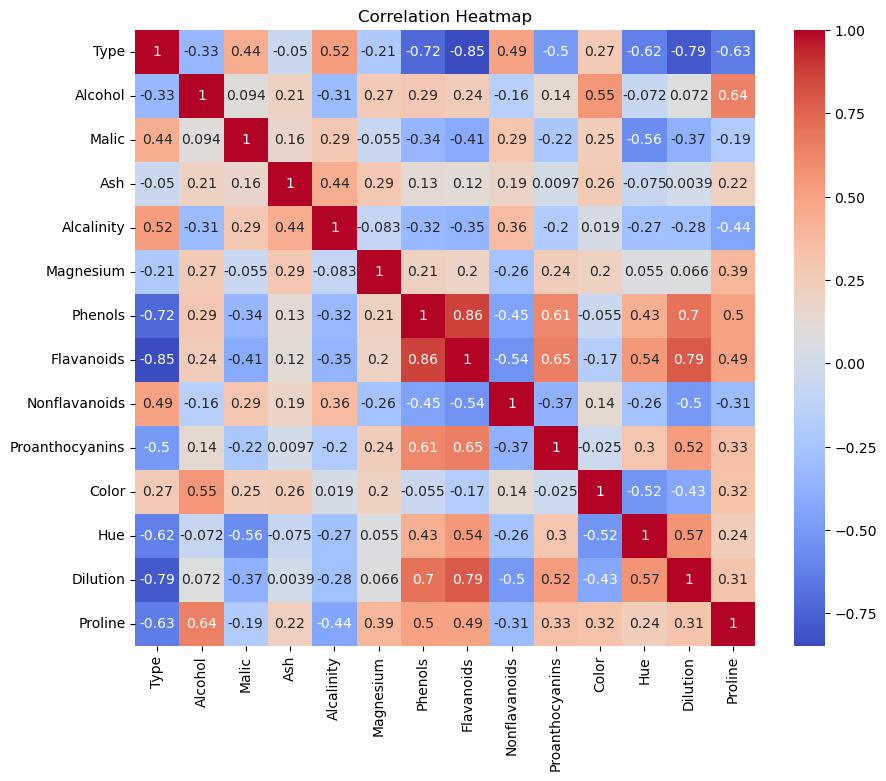

In [35]:
plt.figure(figsize=(10, 8))
sns.heatmap(wines.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [39]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(wines.select_dtypes(include=np.number))


In [41]:
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

In [23]:
pca_components.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
PC1,1.000000e+00,1.251851e-16,-7.842419e-17,-1.253706e-16,-1.020969e-16,1.694188e-16,2.371203e-17,2.172232e-16,-6.419389e-18,-2.660532e-16,1.748711e-16,2.974488e-16,1.108866e-16
PC2,1.251851e-16,1.000000e+00,2.691548e-16,-6.835019e-17,-1.914382e-16,4.139149e-17,1.175802e-16,-1.404115e-16,-3.525054e-17,1.646937e-16,-4.585337e-16,2.382797e-16,5.610293e-16
PC3,-7.842419e-17,2.691548e-16,1.000000e+00,-3.219294e-16,-1.196031e-16,-2.874927e-16,2.708009e-16,3.360678e-16,-1.621235e-16,4.833115e-16,-2.226765e-16,5.053342e-16,-2.742397e-16
PC4,-1.253706e-16,-6.835019e-17,-3.219294e-16,1.000000e+00,2.211748e-16,-3.902838e-16,1.715816e-16,-2.358591e-16,-5.114541e-16,-3.875686e-16,1.608887e-17,1.148230e-16,7.067424e-16
PC5,-1.020969e-16,-1.914382e-16,-1.196031e-16,2.211748e-16,1.000000e+00,-4.935522e-16,-7.035515e-19,2.550720e-16,6.042881e-16,2.106324e-17,-2.469059e-16,-4.873426e-16,6.027339e-16
PC6,1.694188e-16,4.139149e-17,-2.874927e-16,-3.902838e-16,-4.935522e-16,1.000000e+00,-1.174488e-16,-3.116096e-17,-1.017715e-16,4.546866e-17,-3.740232e-16,6.597024e-16,2.397508e-16
PC7,2.371203e-17,1.175802e-16,2.708009e-16,1.715816e-16,-7.035515e-19,-1.174488e-16,1.000000e+00,-6.126684e-17,-1.873405e-16,-2.013388e-16,1.972363e-16,2.748361e-16,-4.640242e-16
PC8,2.172232e-16,-1.404115e-16,3.360678e-16,-2.358591e-16,2.550720e-16,-3.116096e-17,-6.126684e-17,1.000000e+00,1.387339e-15,-4.273966e-16,2.009499e-16,1.538116e-15,9.496737e-16
PC9,-6.419389e-18,-3.525054e-17,-1.621235e-16,-5.114541e-16,6.042881e-16,-1.017715e-16,-1.873405e-16,1.387339e-15,1.000000e+00,7.972514e-16,-2.222398e-15,-1.172987e-15,8.914861e-16
PC10,-2.660532e-16,1.646937e-16,4.833115e-16,-3.875686e-16,2.106324e-17,4.546866e-17,-2.013388e-16,-4.273966e-16,7.972514e-16,1.000000e+00,4.931482e-16,-1.932280e-17,-1.137874e-15


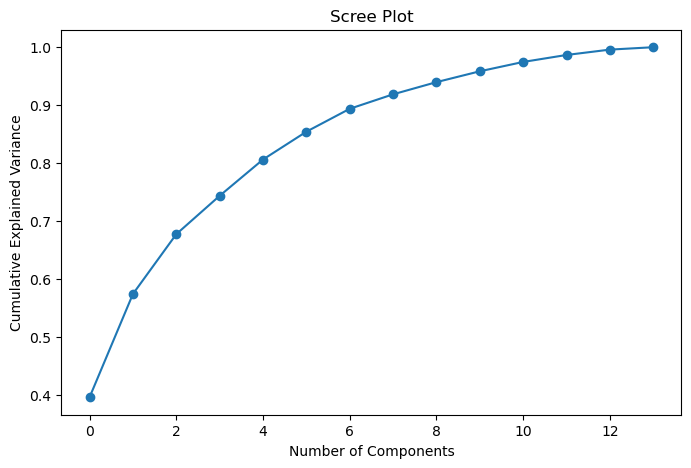

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()


In [45]:
pca = PCA(n_components=2)
pca_data_2d = pca.fit_transform(data_scaled)

In [47]:
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

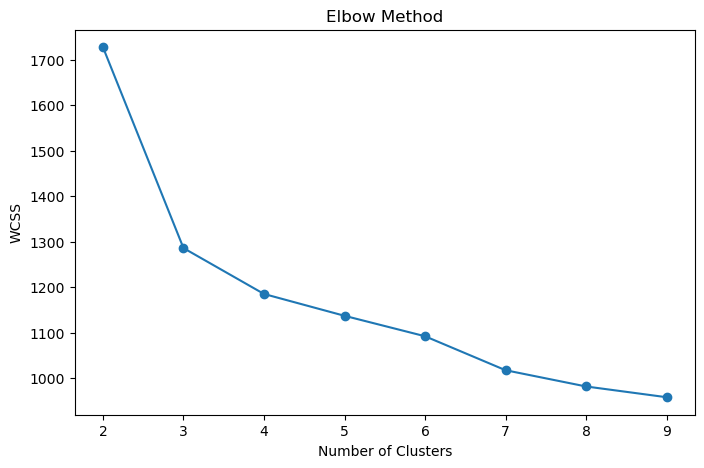

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [51]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)


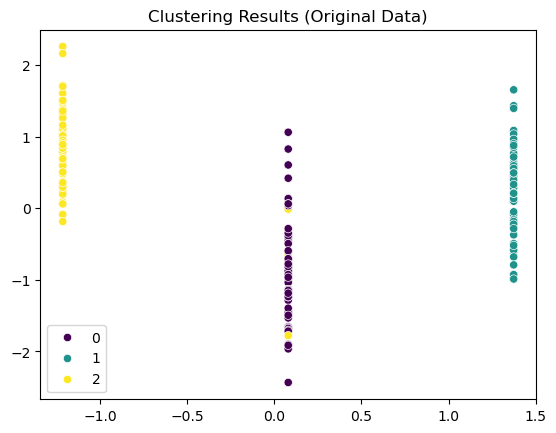

In [53]:
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette='viridis')
plt.title("Clustering Results (Original Data)")
plt.show()


In [55]:
sil_score = silhouette_score(data_scaled, clusters)
print("Silhouette Score (Original Data):", sil_score)

Silhouette Score (Original Data): 0.30648398324833453


In [57]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_data_2d)


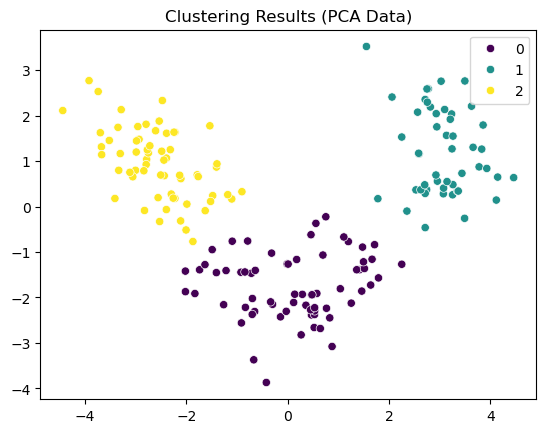

In [59]:
sns.scatterplot(x=pca_data_2d[:, 0], y=pca_data_2d[:, 1], hue=clusters_pca, palette='viridis')
plt.title("Clustering Results (PCA Data)")
plt.show()


In [61]:
sil_score_pca = silhouette_score(pca_data_2d, clusters_pca)
print("Silhouette Score (PCA Data):", sil_score_pca)


Silhouette Score (PCA Data): 0.6024415520362845


In [63]:
print("\nComparison of Clustering Performance:")
print("Silhouette Score (Original Data):", sil_score)
print("Silhouette Score (PCA Data):", sil_score_pca)


Comparison of Clustering Performance:
Silhouette Score (Original Data): 0.30648398324833453
Silhouette Score (PCA Data): 0.6024415520362845


In [65]:
print("\nKey Findings:")
print("- PCA reduced the dimensions while retaining most of the variance.")
print("- Clustering on PCA data was computationally faster and achieved a silhouette score of", sil_score_pca)
print("- Use PCA when the dataset has many features to improve clustering efficiency and visualization.")



Key Findings:
- PCA reduced the dimensions while retaining most of the variance.
- Clustering on PCA data was computationally faster and achieved a silhouette score of 0.6024415520362845
- Use PCA when the dataset has many features to improve clustering efficiency and visualization.
